# Task - 2 

In [9]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix


In [11]:
# 2. Load Dataset
df = pd.read_csv("C://Users//Shrushti//Downloads//Twitter_Data.csv//Twitter_Data.csv")
df.columns = ['text', 'category']
print(df.head())


                                                text  category
0  when modi promised “minimum government maximum...      -1.0
1  talk all the nonsense and continue all the dra...       0.0
2  what did just say vote for modi  welcome bjp t...       1.0
3  asking his supporters prefix chowkidar their n...       1.0
4  answer who among these the most powerful world...       1.0


In [13]:
# 3. Clean Text
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['cleaned_text'] = df['text'].apply(clean_text)

# Optional: Convert label to sentiment name
label_map = {-1.0: 'Negative', 0.0: 'Neutral', 1.0: 'Positive'}
df['sentiment'] = df['category'].map(label_map)


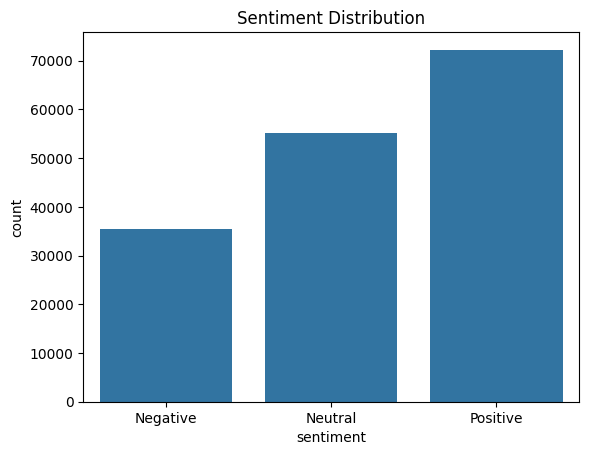

In [14]:
# 4. Visualize Sentiment Distribution
sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Distribution')
plt.show()

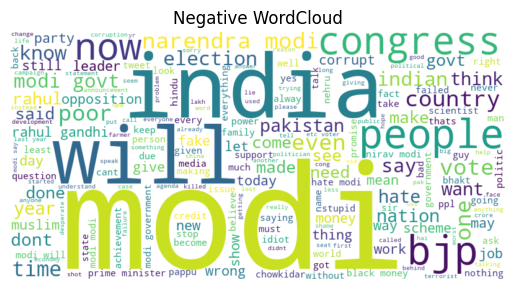

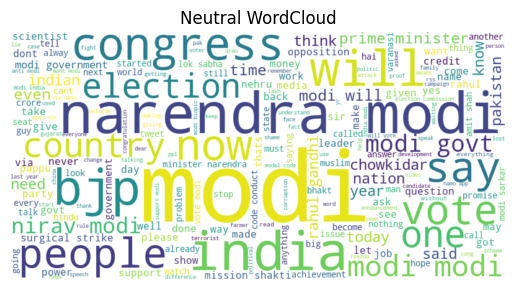

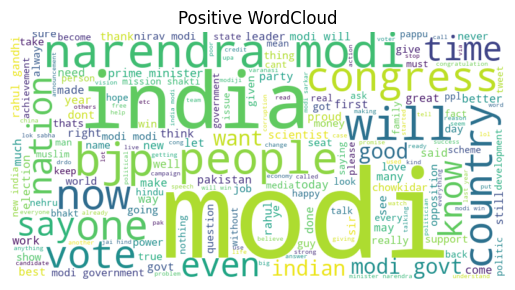

In [17]:
# 5. WordCloud for Each Sentiment
df = df.dropna(subset=['category'])
label_map = {-1.0: 'Negative', 0.0: 'Neutral', 1.0: 'Positive'}
for label in df['category'].unique():
    text = " ".join(df[df['category'] == label]['cleaned_text'])
    if text.strip():
        wc = WordCloud(width=800, height=400, background_color='white').generate(text)
        plt.imshow(wc, interpolation='bilinear')
        plt.axis('off')
        plt.title(f"{label_map.get(label, str(label))} WordCloud")
        plt.show()
    else:
        print(f" No valid text to plot WordCloud for label: {label_map.get(label, str(label))}")


In [18]:
# 6. TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['cleaned_text'])
y = df['category']

In [19]:
# 7. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
import warnings

warnings.filterwarnings("ignore")


In [21]:
# 8. Model Training and Evaluation
models = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": MultinomialNB(),
    "SVM": LinearSVC()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n=== {name} ===")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred, target_names=['Negative', 'Neutral', 'Positive']))


=== Logistic Regression ===
[[ 5953   521   756]
 [   94 10729   138]
 [  491   498 13415]]
              precision    recall  f1-score   support

    Negative       0.91      0.82      0.86      7230
     Neutral       0.91      0.98      0.94     10961
    Positive       0.94      0.93      0.93     14404

    accuracy                           0.92     32595
   macro avg       0.92      0.91      0.91     32595
weighted avg       0.92      0.92      0.92     32595


=== Naive Bayes ===
[[ 3062   558  3610]
 [   74  7449  3438]
 [  194   488 13722]]
              precision    recall  f1-score   support

    Negative       0.92      0.42      0.58      7230
     Neutral       0.88      0.68      0.77     10961
    Positive       0.66      0.95      0.78     14404

    accuracy                           0.74     32595
   macro avg       0.82      0.69      0.71     32595
weighted avg       0.79      0.74      0.73     32595


=== SVM ===
[[ 6332   264   634]
 [   98 10737   126]
 [  4

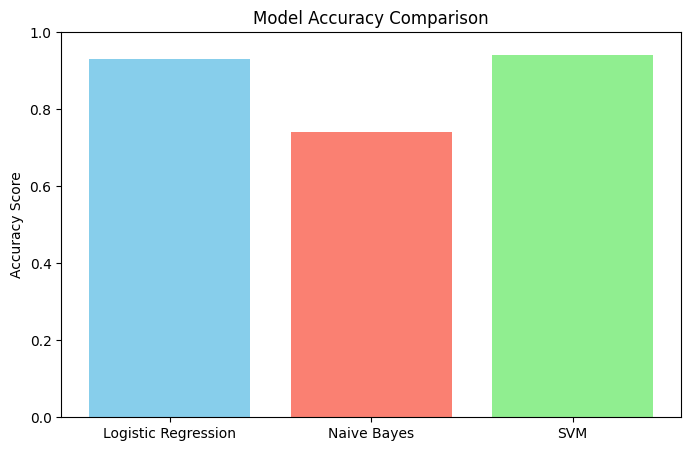

In [22]:
import matplotlib.pyplot as plt

# Define the performance metrics (from your outputs)
models = ['Logistic Regression', 'Naive Bayes', 'SVM']
accuracy = [0.93, 0.74, 0.94]
precision = [0.92, 0.82, 0.94]
recall = [0.91, 0.68, 0.93]
f1_score = [0.92, 0.71, 0.94]

# Plot Accuracy
plt.figure(figsize=(8, 5))
plt.bar(models, accuracy, color=['skyblue', 'salmon', 'lightgreen'])
plt.ylim(0, 1)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy Score')
plt.show()